# Disease Prediction

### Importing essential libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import tensorflow as tf
import plotly.express as px
import ipywidgets as widgets
from sklearn.linear_model import LogisticRegression # for logistic regression
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
from sklearn.metrics import accuracy_score #for calculating accuracy
from sklearn.naive_bayes import GaussianNB #for naive bayes
from sklearn.preprocessing import LabelEncoder # to encode object variables
from tensorflow.keras.models import Sequential   # used for initialize ANN model
from tensorflow.keras import layers   # used for different layer structure
from tensorflow.keras.layers import Dense
from IPython.display import display

### Import train and test data sets

### The train dataset has :
* `4920` ROWS and `134` COLUMNS.
* `132` columns of `Symptoms` as `input`.
* `1` column of `prognosis` as `output`
* `1` unknown column `Unnamed: 133` containing `NaN` values

In [2]:
train_data=pd.read_csv('Training.csv') #training data
test_data=pd.read_csv('Testing.csv') #test data 
train_data.head() #preview of training data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


### Removing the `NaN` column from training data

In [3]:
train_data=train_data.drop('Unnamed: 133',axis=1)
train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


### Test Data

### The test dataset has :
* `42` ROWS and `133` COLUMNS.
* `132` columns of `Symptoms` as `INPUT`. 
* `1` column of `prognosis` as `OUTPUT`.

In [5]:
test_data.head() #preview of test data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


### Concatenate the test and train data set and we will split them evenly afterwards as the original ratio was 4920 to 42 which was not balanced
* The joint dataset has `133` columns and `4962` rows of data with type `int`

In [7]:
jointdata=pd.concat([train_data,test_data], axis = 0)
jointdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4962 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.1+ MB


In [8]:
# preview of joint data
jointdata.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


## Exploratory Data analysis

### Response

* There are `41` possible unique outputs
* All outputs has an equal count of `121` except for Fungal Infection which as a count of `122`

In [9]:
# count of each unique output 'Prognosis' in the dataset
print('Number of Unique outputs:',len(jointdata['prognosis'].unique()))
print("Count of each encoded output:")
print(jointdata['prognosis'].value_counts().head())


Number of Unique outputs: 41
Count of each encoded output:
Fungal infection       122
Hepatitis C            121
Hepatitis E            121
Alcoholic hepatitis    121
Tuberculosis           121
Name: prognosis, dtype: int64


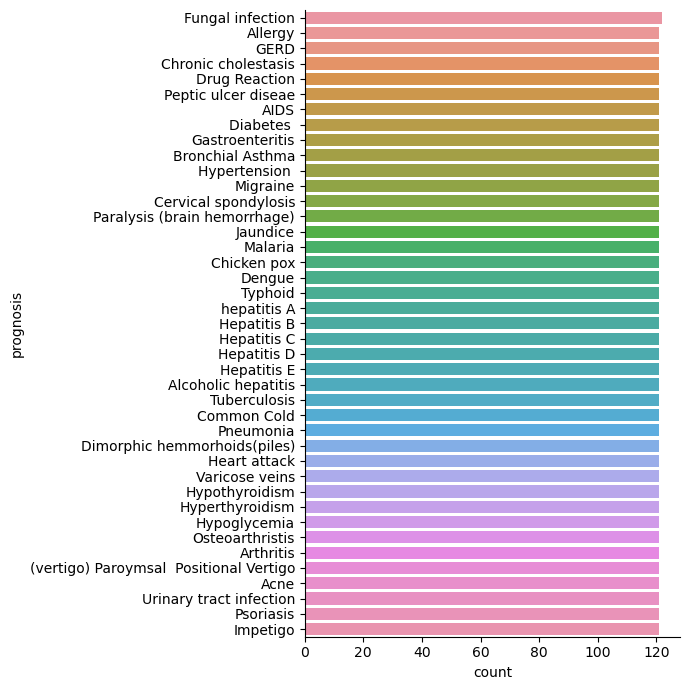

In [10]:

# categorical plot
p=sb.catplot(y = "prognosis", data = jointdata, kind = "count",height =7)
plt.show()

## Top 10 most common symptoms

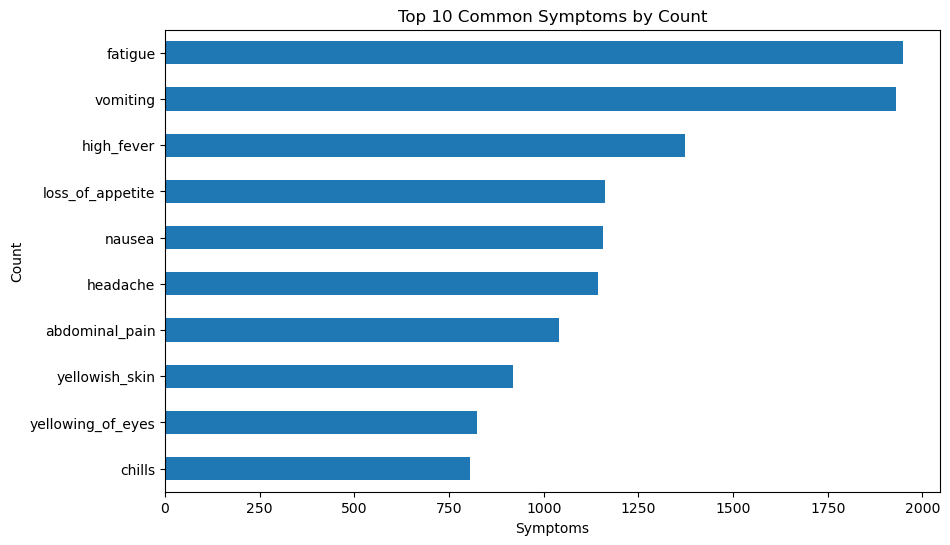

In [11]:
col_sum = jointdata.sum()
col_sum=col_sum.drop('prognosis')
col_sum=col_sum.sort_values(ascending=False)
col_sum=col_sum.head(10)
col_sum=col_sum.sort_values(ascending=True)
col_sum = col_sum.reset_index().rename(columns={'index': 'SYMPTOMS',  0:'COUNT'})

ax = col_sum.plot(x='SYMPTOMS', y='COUNT', kind='barh', figsize=(10, 6), legend=False)

# Set the title and axis labels
ax.set_title('Top 10 Common Symptoms by Count')
ax.set_xlabel('Symptoms')
ax.set_ylabel('Count')

plt.show()

## Top 10 rarest symptoms

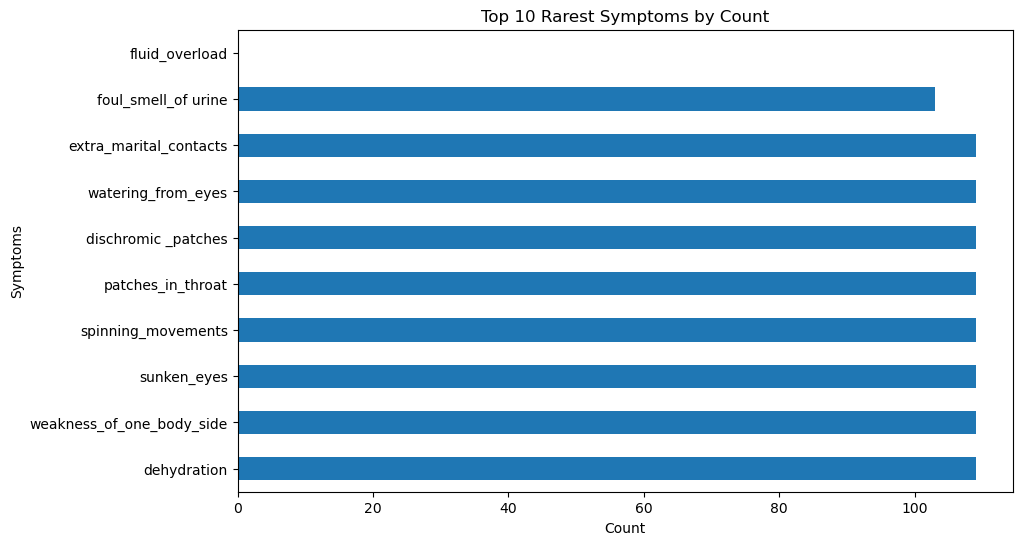

In [12]:
col_sum = jointdata.sum()
col_sum=col_sum.drop('prognosis')
col_sum=col_sum.sort_values(ascending=True)
col_sum=col_sum.head(10)
col_sum=col_sum.sort_values(ascending=False)
col_sum = col_sum.reset_index().rename(columns={'index': 'SYMPTOMS',  0:'COUNT'})

ax = col_sum.plot(x='SYMPTOMS', y='COUNT', kind='barh', figsize=(10, 6), legend=False)

# Set the title and axis labels
ax.set_title('Top 10 Rarest Symptoms by Count')
ax.set_ylabel('Symptoms')
ax.set_xlabel('Count')

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2360\890001033.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(top5.keys(), rotation=45)


<Figure size 640x480 with 0 Axes>

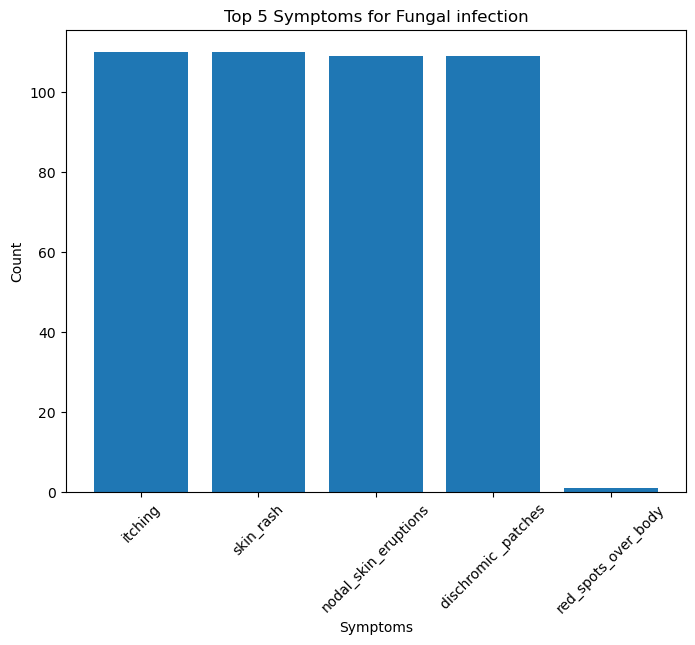

Dropdown(description='Prognosis:', options=('Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Dru…

C:\Users\User\AppData\Local\Temp\ipykernel_2360\890001033.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(top5.keys(), rotation=45)


<Figure size 640x480 with 0 Axes>

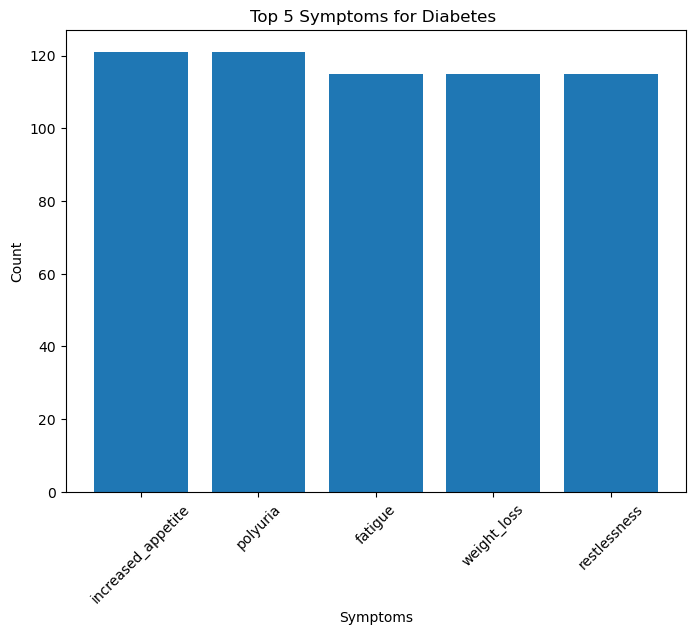

In [14]:
# Step 2: Define a function to get the top 5 symptoms for a given prognosis and their counts
def get_top5_symptoms(prognosis):
    symptoms = jointdata[jointdata['prognosis'] == prognosis].iloc[:,:-1].sum().nlargest(5)
    return dict(symptoms)

# Step 3: Create a dropdown menu to select a prognosis
prognosis_dropdown = widgets.Dropdown(
    options=list(jointdata['prognosis'].unique()),
    description='Prognosis:',
    disabled=False,
)

# Step 4: Create a function to update the plot based on the selected prognosis
def update_plot(change):
    plt.clf() # clear the previous plot
    prognosis = change['new']
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    top5 = get_top5_symptoms(prognosis)
    axs.bar(top5.keys(), top5.values())
    axs.set_xlabel('Symptoms')
    axs.set_xticklabels(top5.keys(), rotation=45)
    axs.set_ylabel('Count')
    axs.set_title(f'Top 5 Symptoms for {prognosis}')
    plt.show()

# Step 5: Use observe to link the dropdown menu to the update_plot function
prognosis_dropdown.observe(update_plot, names='value')

# Step 6: Display the initial plot for the first prognosis in the dropdown menu
initial_prognosis = list(jointdata['prognosis'].unique())[0]
update_plot({'new': initial_prognosis})

# Step 7: Display the dropdown menu
display(prognosis_dropdown)


### Checking for missing data or NULL values
* there are no `NaN` values

In [15]:
sumofnan=0
nan_count = jointdata.isna().sum()
for i in nan_count:
    sumofnan+=i
print("Number of NaN values : ",i)
nan_count

Number of NaN values :  0


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

### Checking for outliers
* there are no outliers

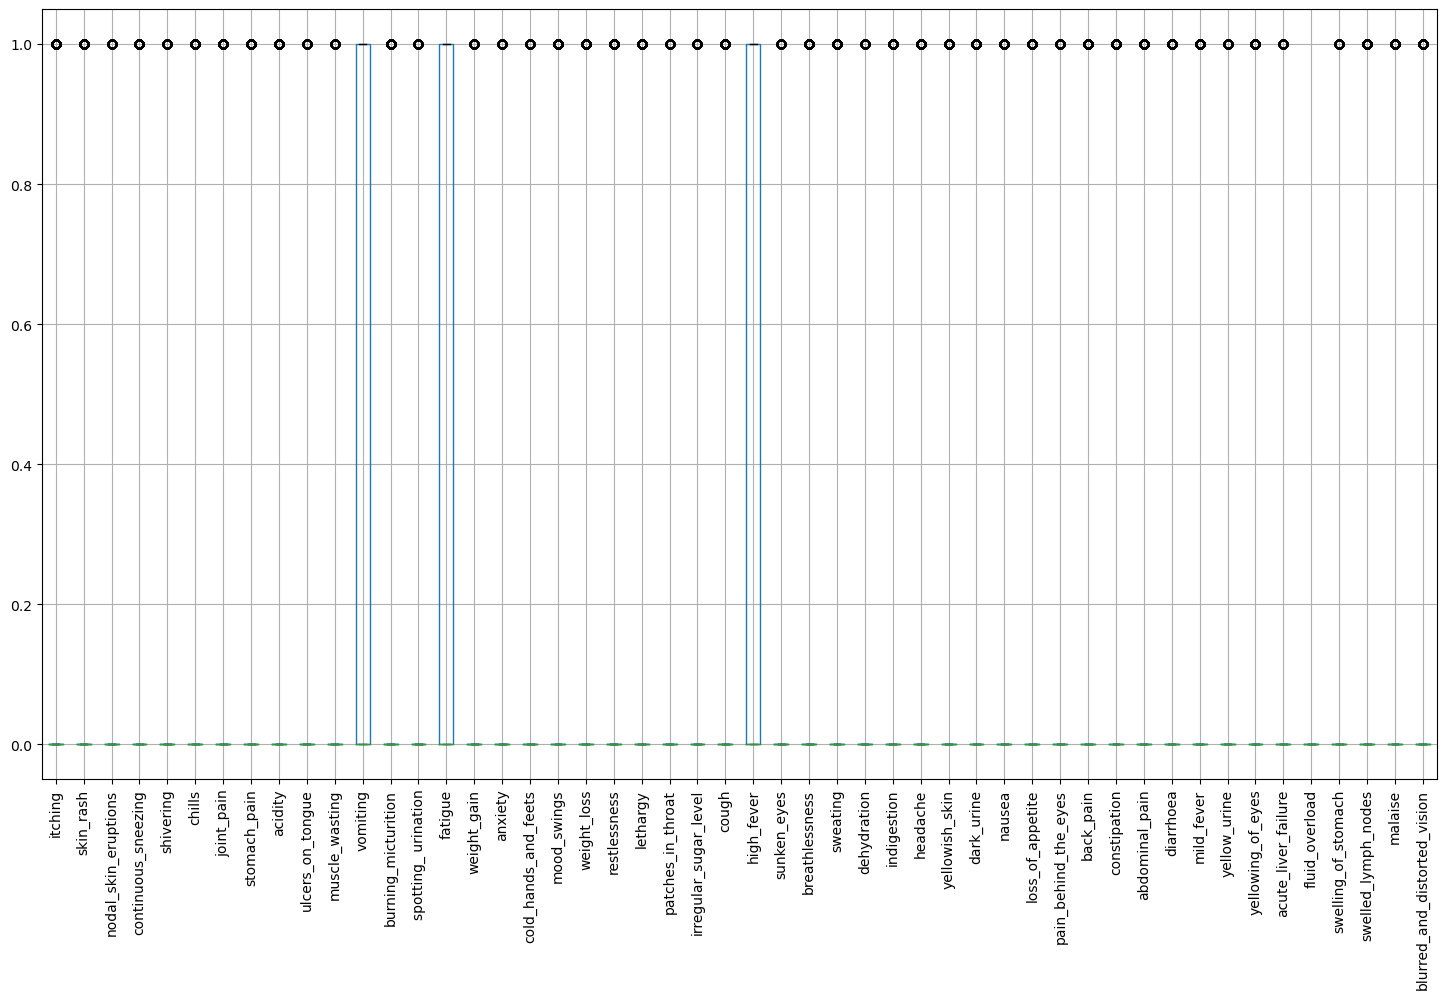

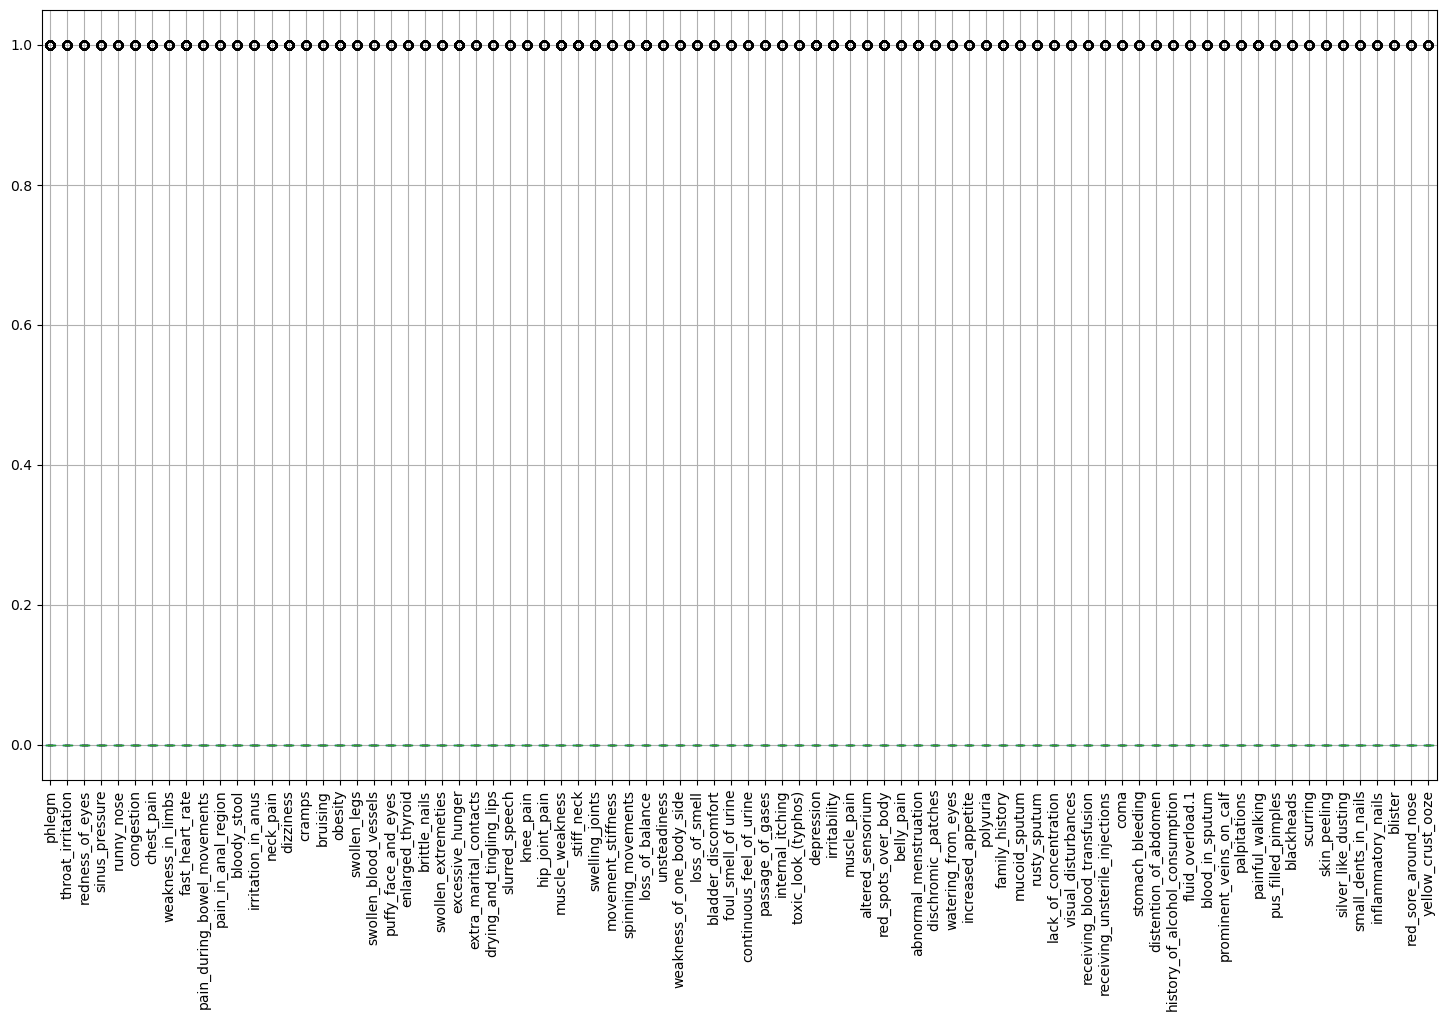

In [16]:
temp_df=train_data.iloc[:,:-1]

#Detect outliers
plt.subplots(figsize=(18,10))

temp_df.iloc[:,:50].boxplot()
plt.xticks(rotation=90)

plt.show()

plt.subplots(figsize=(18,10))

temp_df.iloc[:,50:].boxplot()
plt.xticks(rotation=90)

plt.show()

### Heat map featuring the correlation between symptoms

C:\Users\User\AppData\Local\Temp\ipykernel_2360\386875671.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(train_data.corr(), cmap = 'PuBu', annot = False)


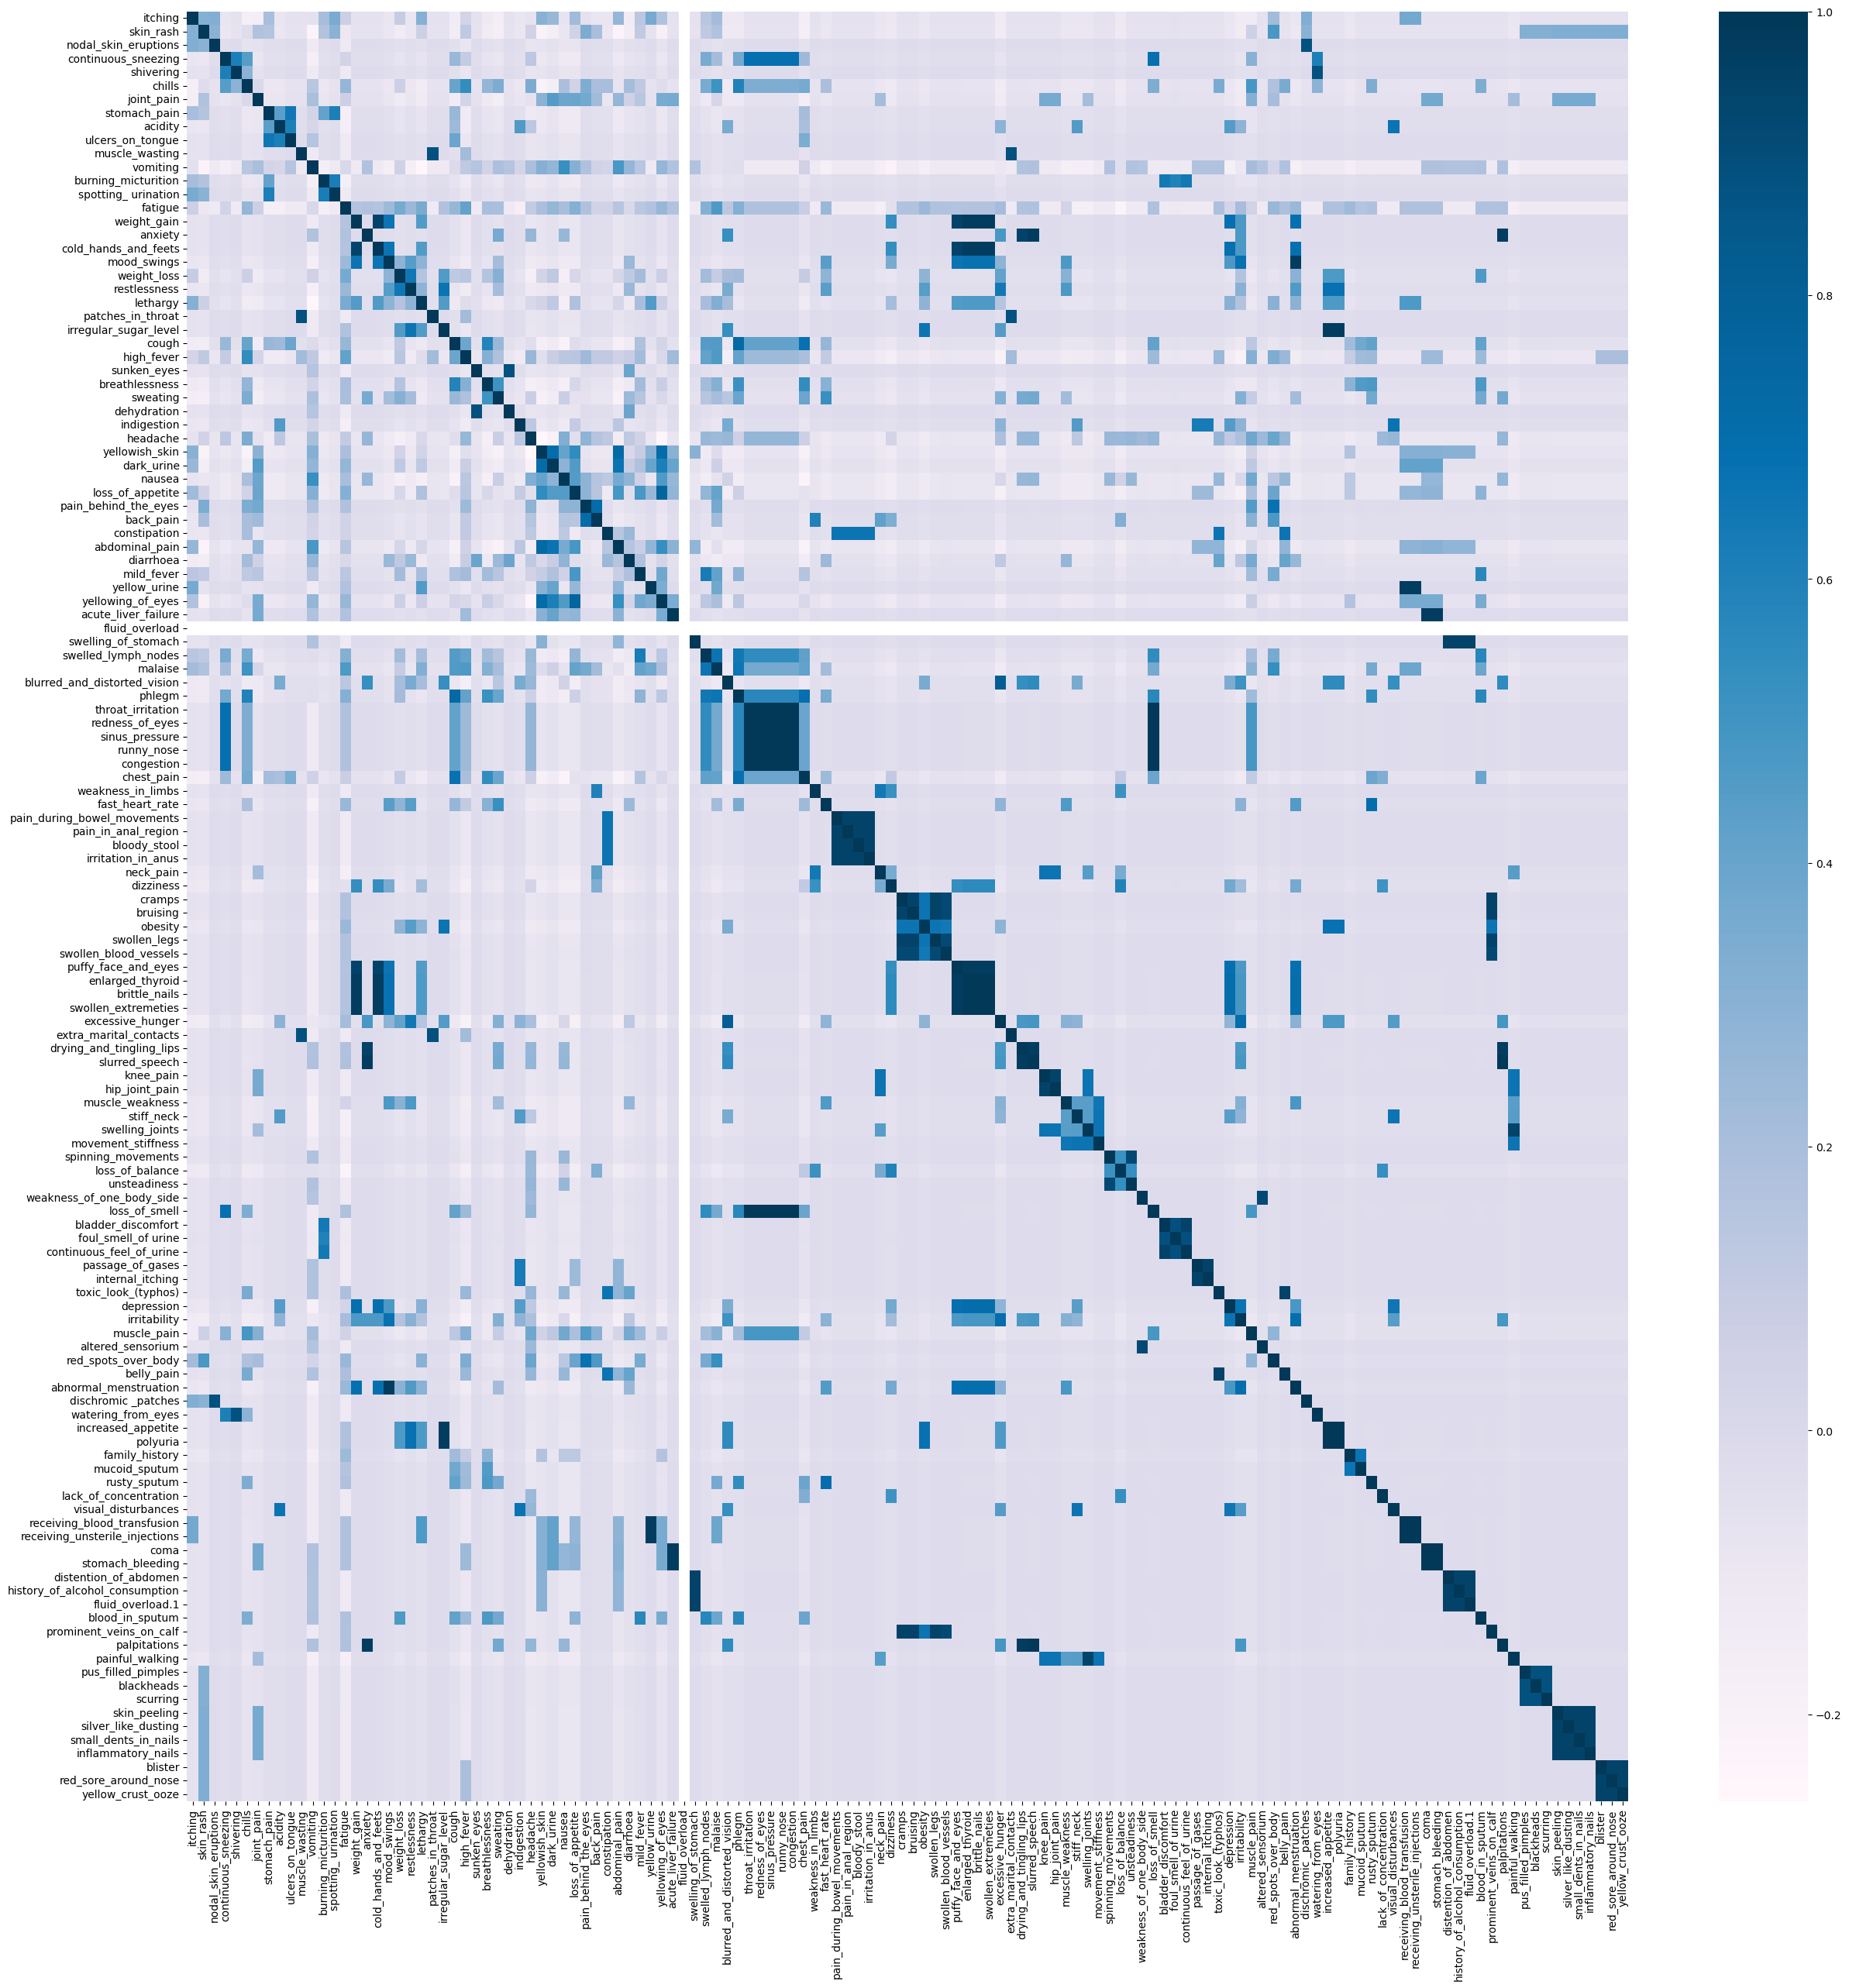

In [17]:
plt.figure(figsize = (30, 30))
sb.heatmap(train_data.corr(), cmap = 'PuBu', annot = False)
plt.show()

In [18]:
corr_matrix=train_data.corr()
corr_matrix=corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corr_matrix

C:\Users\User\AppData\Local\Temp\ipykernel_2360\619721827.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=train_data.corr()
C:\Users\User\AppData\Local\Temp\ipykernel_2360\619721827.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_matrix=corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,NaN,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,NaN,NaN,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,NaN,NaN,NaN,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,NaN,NaN,NaN,NaN,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,NaN,NaN,NaN,NaN,NaN,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.023720,-0.023720,-0.023720
blister,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946120,0.946120
red_sore_around_nose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946120


In [19]:
# finding the index of columns with a correlation of more than 0.7
drop = [i for i in corr_matrix.columns if any(corr_matrix[i] > 0.7)]
print(drop,len(drop))
jointdata=jointdata.drop(drop, axis=1)

['cold_hands_and_feets', 'patches_in_throat', 'dehydration', 'dark_urine', 'back_pain', 'abdominal_pain', 'yellowing_of_eyes', 'phlegm', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'bruising', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech', 'hip_joint_pain', 'unsteadiness', 'loss_of_smell', 'foul_smell_of urine', 'continuous_feel_of_urine', 'internal_itching', 'depression', 'irritability', 'altered_sensorium', 'belly_pain', 'abnormal_menstruation', 'dischromic _patches', 'watering_from_eyes', 'increased_appetite', 'polyuria', 'rusty_sputum', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'prominent_veins_on_calf', 'pa

### Encoding the categorical data
* `Prognosis` has been encoded into numerical data type `int`

In [20]:
encoder = LabelEncoder()
jointdata["prognosis"] = encoder.fit_transform(jointdata["prognosis"])
jointdata.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,red_spots_over_body,family_history,mucoid_sputum,lack_of_concentration,visual_disturbances,blood_in_sputum,pus_filled_pimples,skin_peeling,blister,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


### Spliting training and test set into x and y

In [21]:
y=jointdata["prognosis"]
x=jointdata.drop('prognosis',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Logistic Regression

In [22]:
log = LogisticRegression(C=0.2,random_state=42, penalty='l2')

# training the model
log.fit(x_train, y_train)

# evaluating the model 
train_score = log.score(x_train, y_train)
print("Logistic Regression train data accuracy:", train_score)

Logistic Regression train data accuracy: 0.9989922741014444


Logistic Regression test data accuracy: 0.9979848866498741


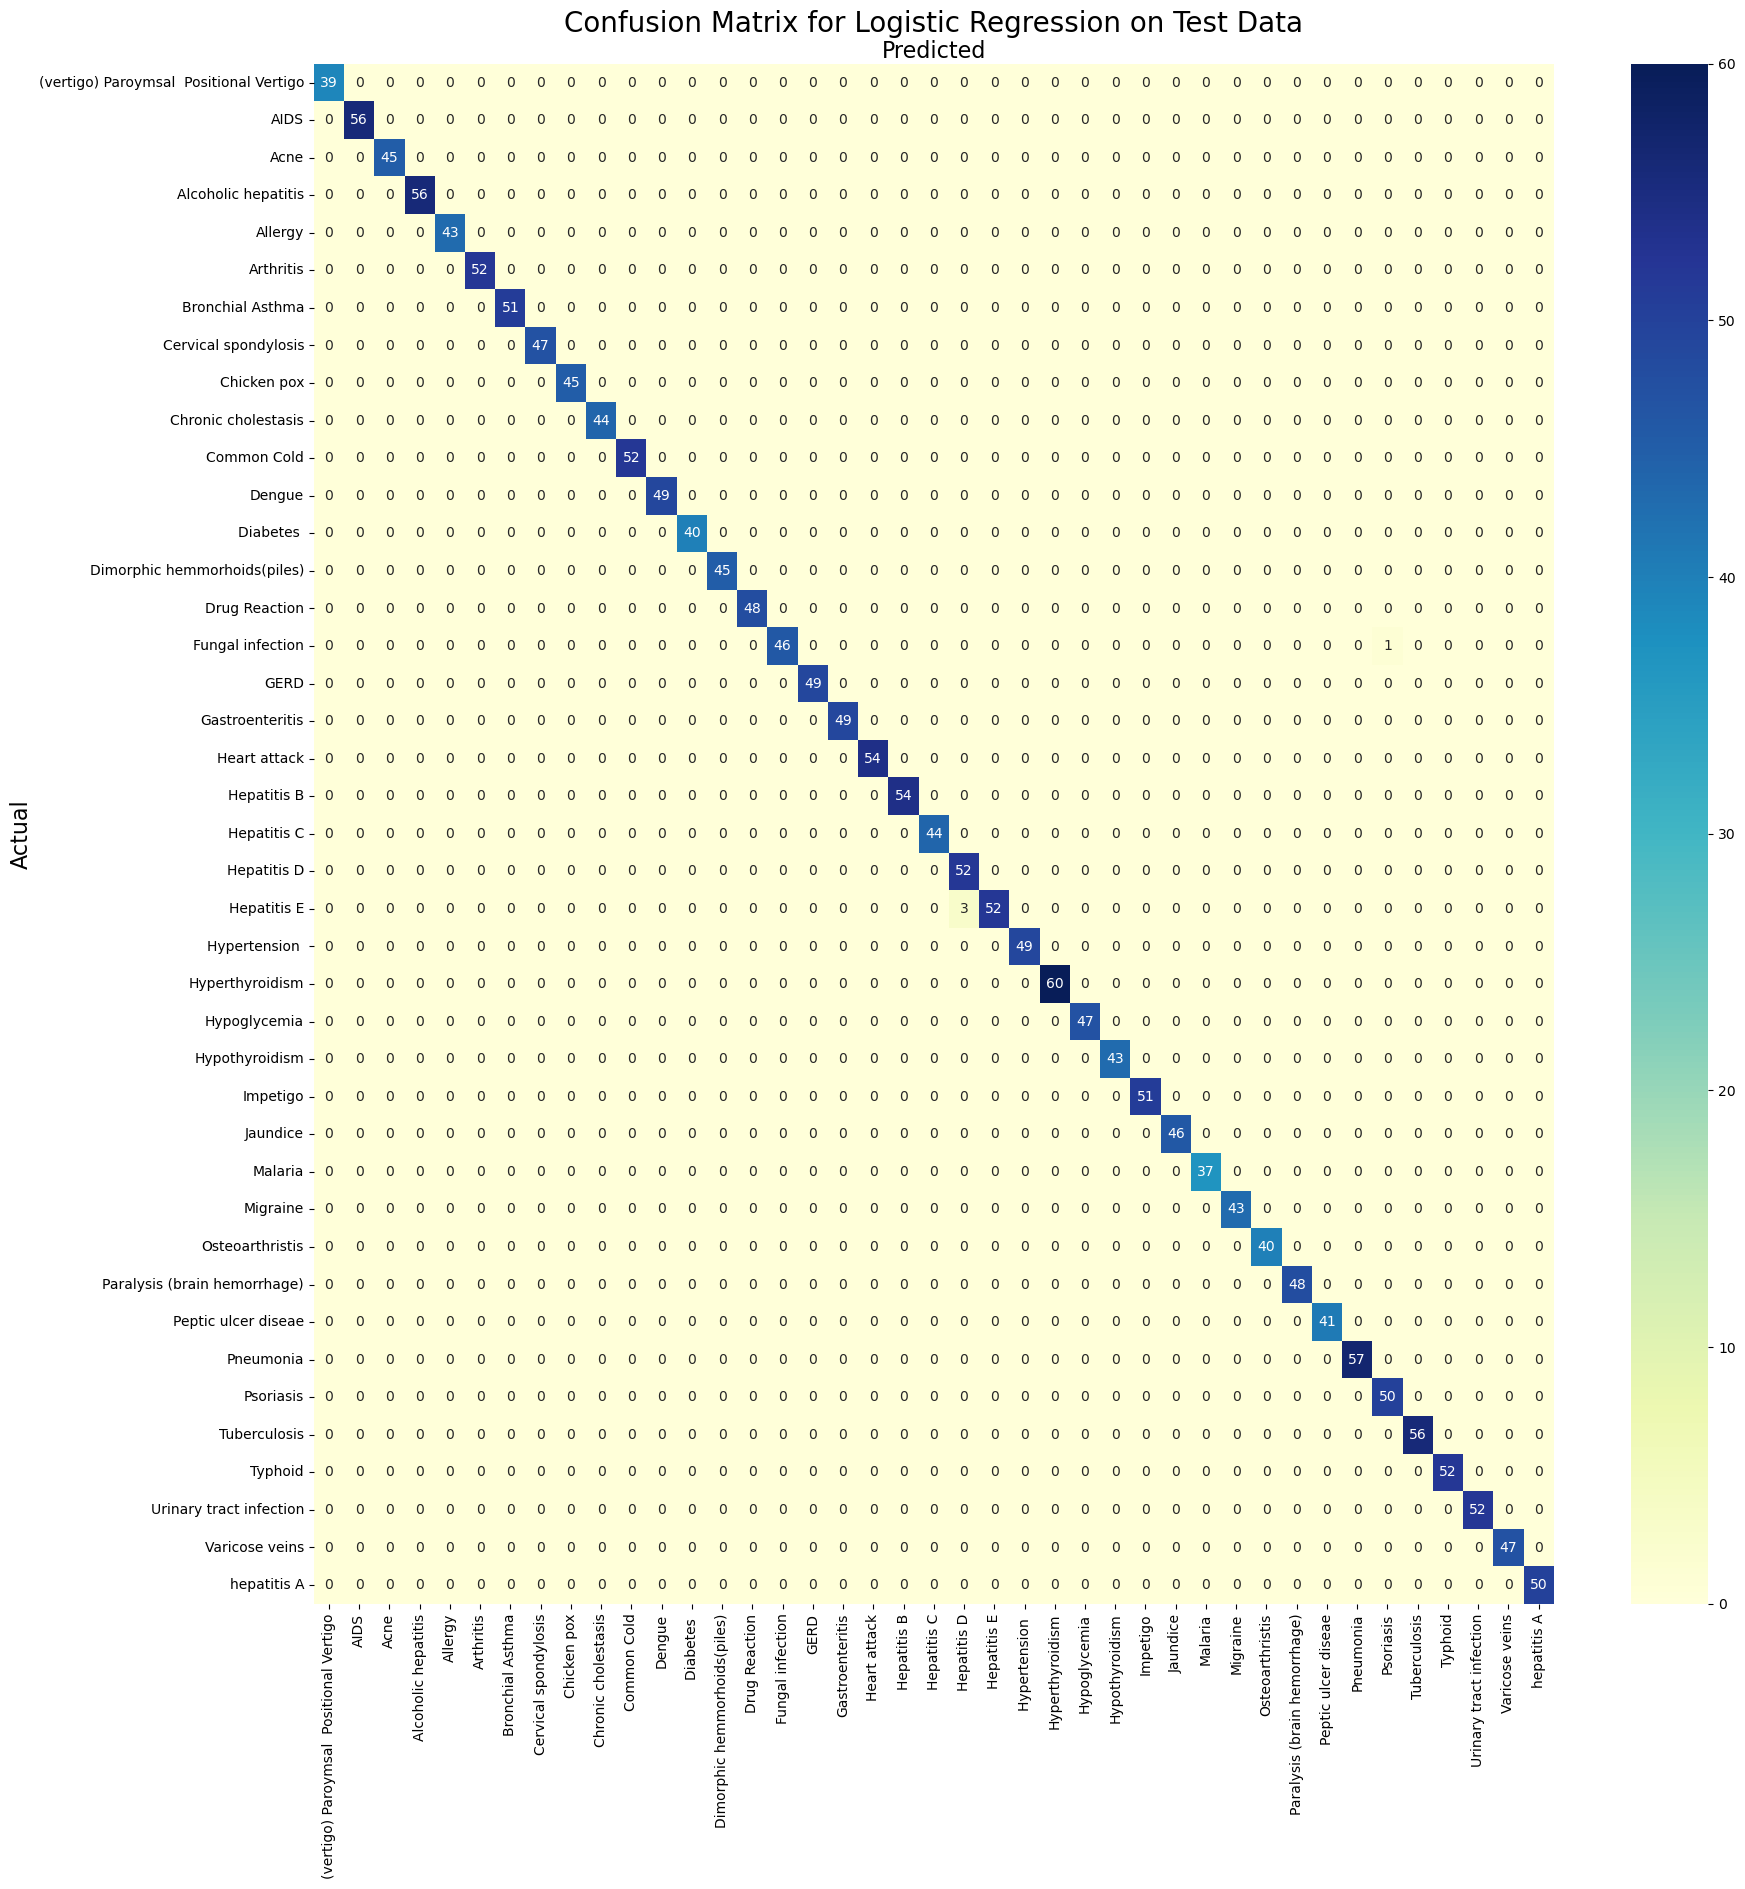

In [23]:
# using log reg to make prediction on the test set
y_pred = log.predict(x_test)

# Evaluate the model performance on the test set
test_score = log.score(x_test, y_test)
print("Logistic Regression test data accuracy:", test_score)

# retrieving class name for the variables
class_names = encoder.classes_
fig, ax = plt.subplots(figsize=(20, 20))

# Set tick marks for the x- and y-axes
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# confusion matrix
cm_lr = confusion_matrix(y_test, y_pred)

# a heatmap of confusion matrix
sb.heatmap(cm_lr, annot=True, cmap="YlGnBu", fmt='g', xticklabels=class_names, yticklabels=class_names, ax=ax)

plt.title("Confusion Matrix for Logistic Regression on Test Data",fontsize=20)

# setting the x and y labels
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
ax.xaxis.set_label_position("top")

plt.show()

# Artificial FeedForward Neural Network

In [46]:
# transform into dummies for y_train (prognosis variable)
y_train_dum = pd.get_dummies(y_train)

In [47]:
# initializing layers
classifier = Sequential([
    layers.Dense(73, activation = "relu"),
    layers.Dense(50, activation = "relu"),
    layers.Dense(41,activation = "softmax")
])

# choosing the optimizer, loss function and evaluation metric for the model
classifier.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

# training the model
history = classifier.fit(x_train, y_train_dum, epochs = 4, batch_size = 30)

# prints a summary of informations in each layer of the nn
classifier.summary()

# printing the accuracy for train set
print("Prediction accuracy for training data: ",format(history.history['accuracy'][-1]*100),'%')

Epoch 1/4
100/100 [==============================] - 1s 1ms/step - loss: 3.0241 - accuracy: 0.5207
Epoch 2/4
100/100 [==============================] - 0s 1ms/step - loss: 0.8165 - accuracy: 0.9882
Epoch 3/4
100/100 [==============================] - 0s 1ms/step - loss: 0.1260 - accuracy: 0.9983
Epoch 4/4
100/100 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9993
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 73)                5402      
                                                                 
 dense_16 (Dense)            (None, 50)                3700      
                                                                 
 dense_17 (Dense)            (None, 41)                2091      
                                                                 
Total params: 11,193
Trainable params: 11,193
Non-trai

### Testing the accuracy of model using test dataset

In [48]:
# predict using test data
y_pred_nn = classifier.predict(x_test)

# filtering the index of the number with the highest value corresponding to the encoded output 
y_pred_nn = [np.argmax(i) for i in y_pred_nn ]

# calculating the accuracy of model for test dataset
print("Prediction accuracy for test set:",format(accuracy_score(y_test, y_pred_nn)*100),'%')

63/63 [==============================] - 0s 1ms/step
Prediction accuracy for test set: 99.84886649874055 %


### Confusion matrix for ANN Test data

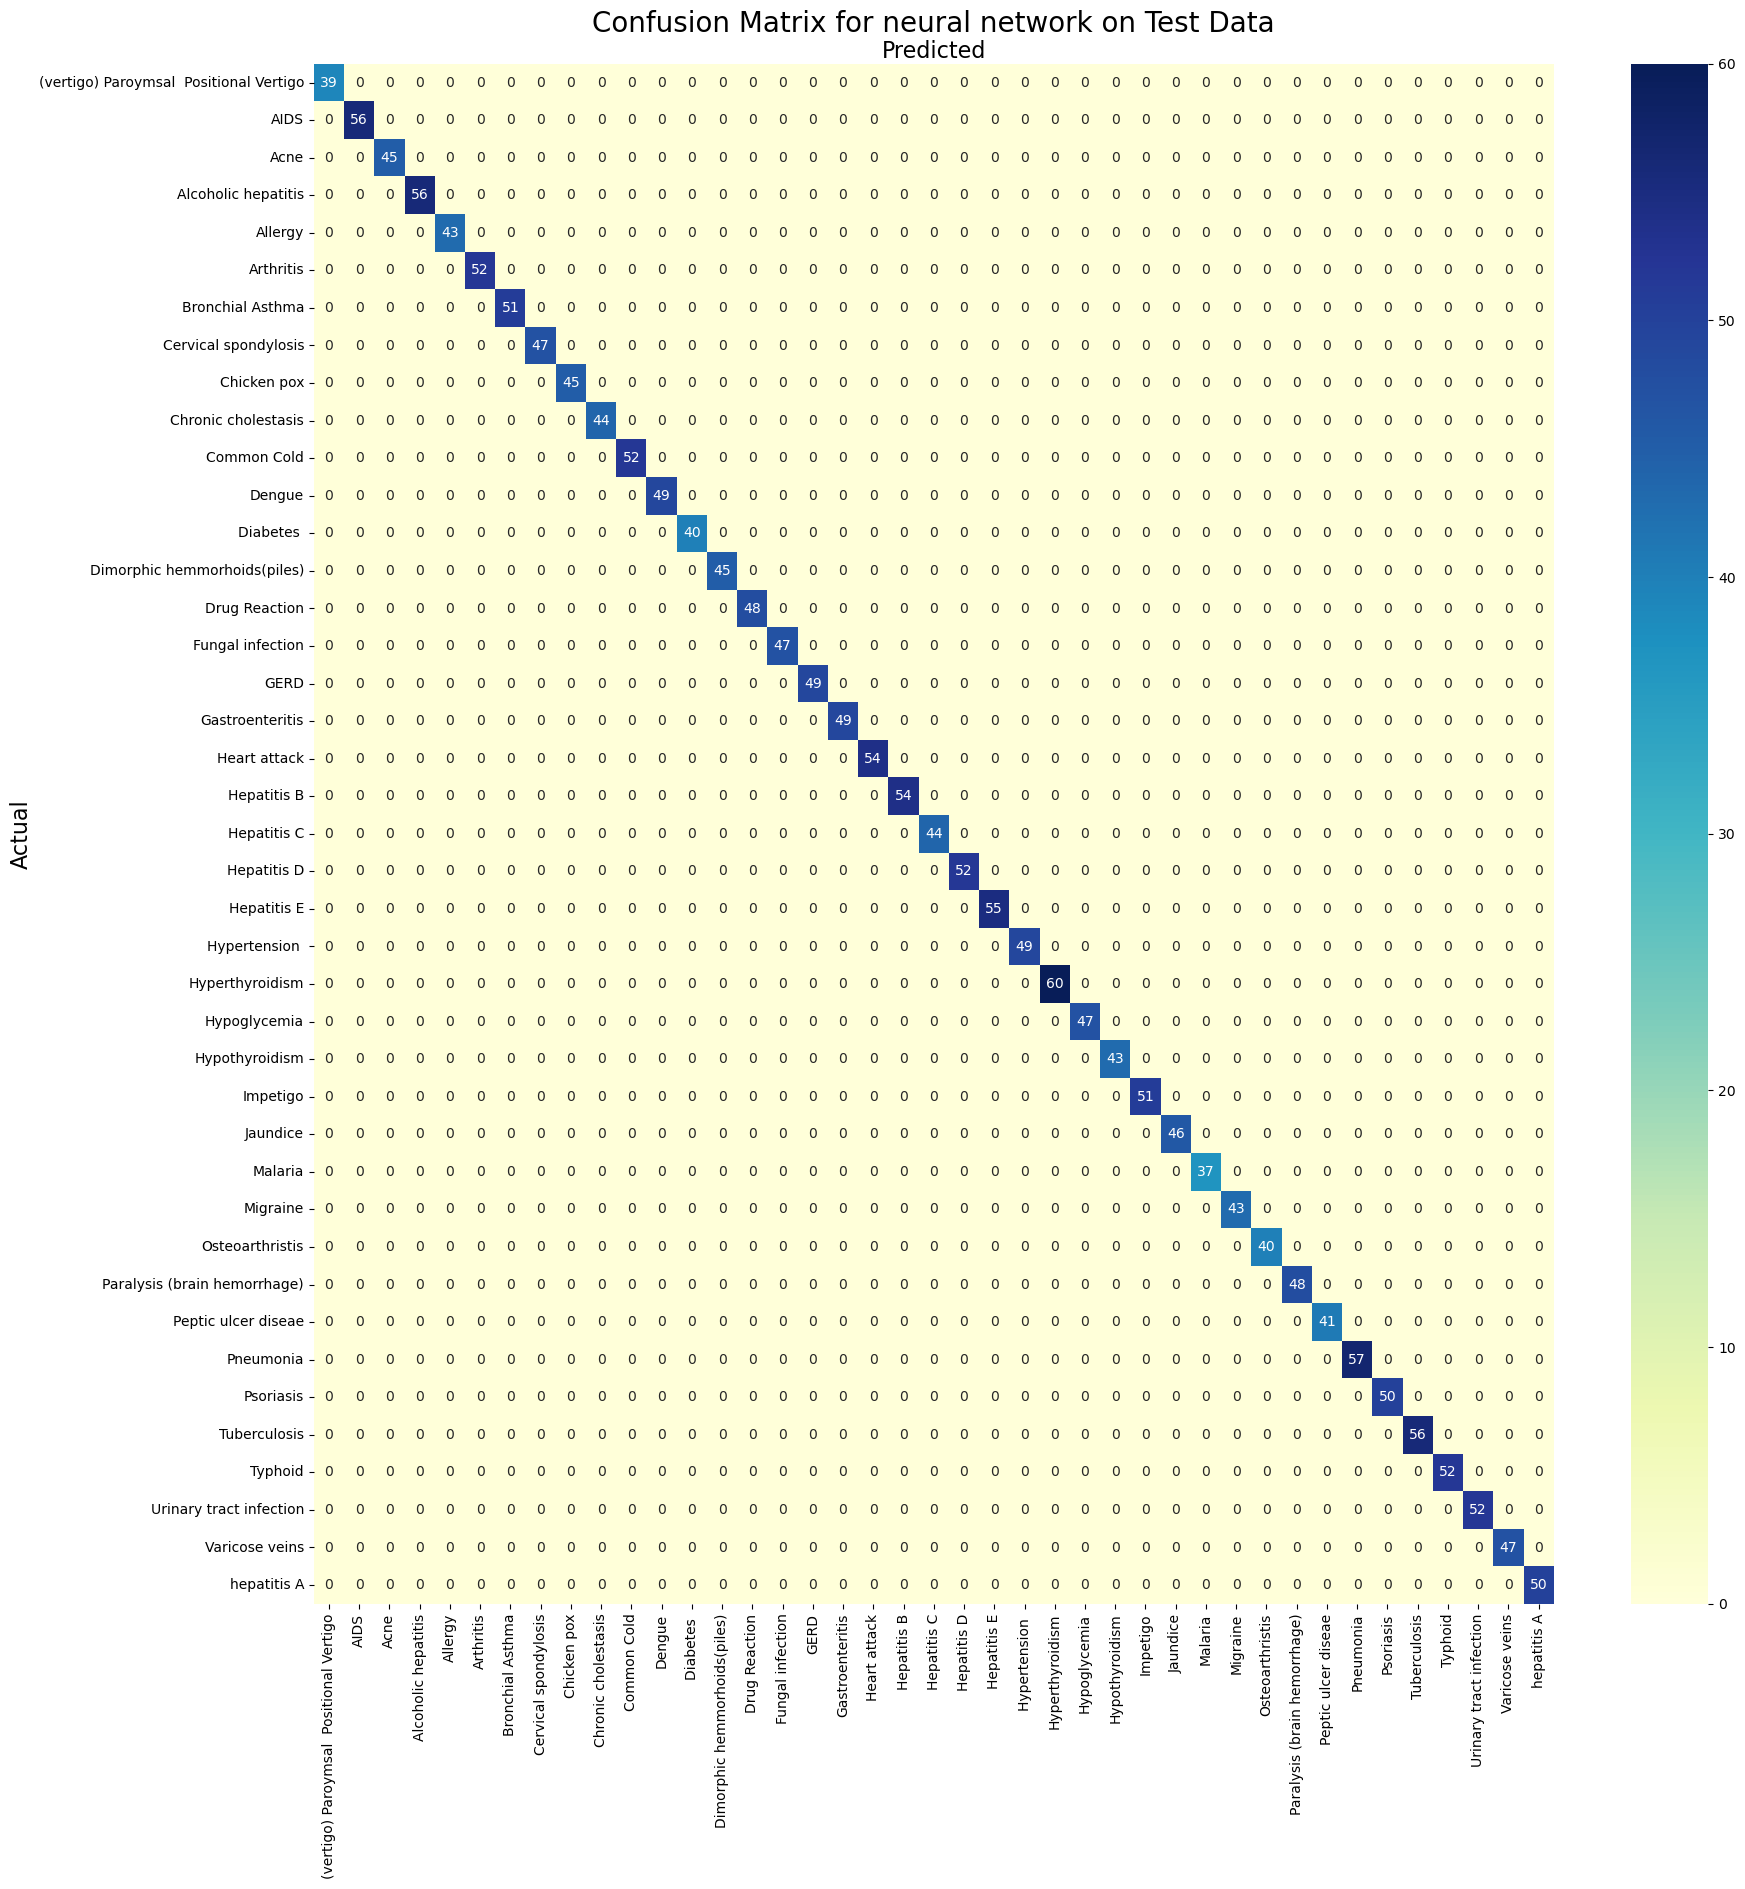

In [31]:
# retrieveing encoded object variables
class_names = encoder.classes_

fig, ax = plt.subplots(figsize=(20, 20))

# Set tick marks for the x and y axis
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# plotting the confusion matrix for test dataset
cm_nn = confusion_matrix(y_test, y_pred_nn)

# plotting heatmap
sb.heatmap(cm_nn, annot=True, cmap="YlGnBu", fmt='g', xticklabels=class_names, yticklabels=class_names, ax=ax)

# inserting title 
plt.title("Confusion Matrix for neural network on Test Data",fontsize=20)

# setting the x and y labels
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
ax.xaxis.set_label_position("top")

plt.show()

## Summary of model prediction accuracy

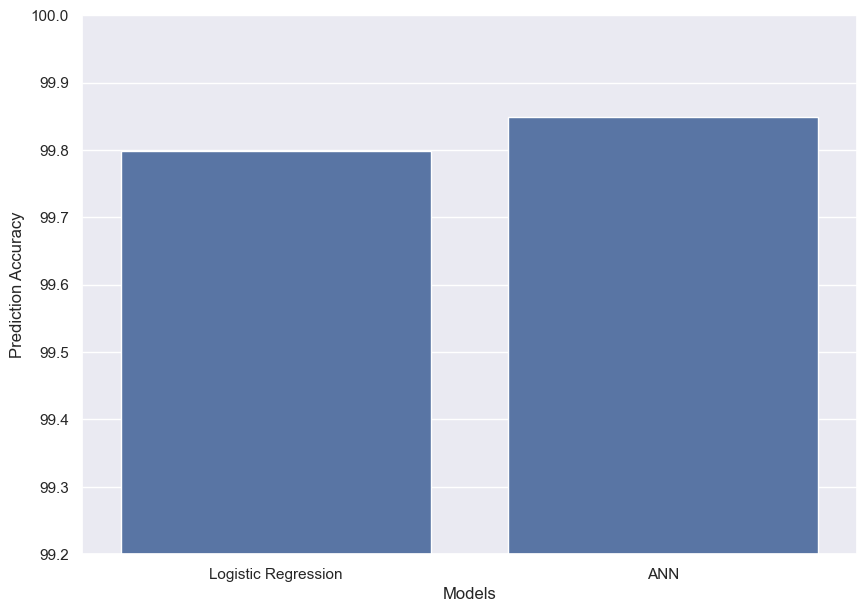

In [49]:
sb.set(style="darkgrid")
summary = pd.DataFrame({'Models':['Logistic Regression','ANN'],'Prediction Accuracy':[99.79848866498741,99.84886649874055]})

# Set the figure size
fig, ax =  plt.subplots(figsize=(10, 7))
ax.set_ylim(99.2, 100)
# plot a bar chart
sb.barplot(x="Models", y="Prediction Accuracy", data=summary,   color='b',orient = 'v');
plt.show()